In [ ]:
# 1. Exploratory Data Analysis (EDA)
!pip install streamlit

import streamlit as st
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

from google.colab import files  # Hanya jika kamu pakai Google Colab


!pip install imblearn

# Load data
df = pd.read_csv("ObesityDataSet.csv")


In [ ]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.11.13.final.0
python-bits           : 64
OS                    : Linux
OS-release            : 6.1.123+
Version               : #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
machine               : x86_64
processor             : x86_64
byteorder             : little
LC_ALL                : en_US.UTF-8
LANG                  : en_US.UTF-8
LOCALE                : en_US.UTF-8

pandas                : 2.2.2
numpy                 : 2.0.2
pytz                  : 2025.2
dateutil              : 2.9.0.post0
setuptools            : 75.2.0
pip                   : 24.1.2
Cython                : 3.0.12
pytest                : 8.3.5
hypothesis            : None
sphinx                : 8.2.3
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.4.0
html5lib              : 1.1
pymysql               : None
psyco

In [ ]:
# Tampilkan beberapa baris pertama dan informasi umum
print("\nHead of dataset:")
display(df.head())
print("\nDataset info:")
print(df.info())
print("\nDescriptive statistics:")
display(df.describe(include='all'))


Head of dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


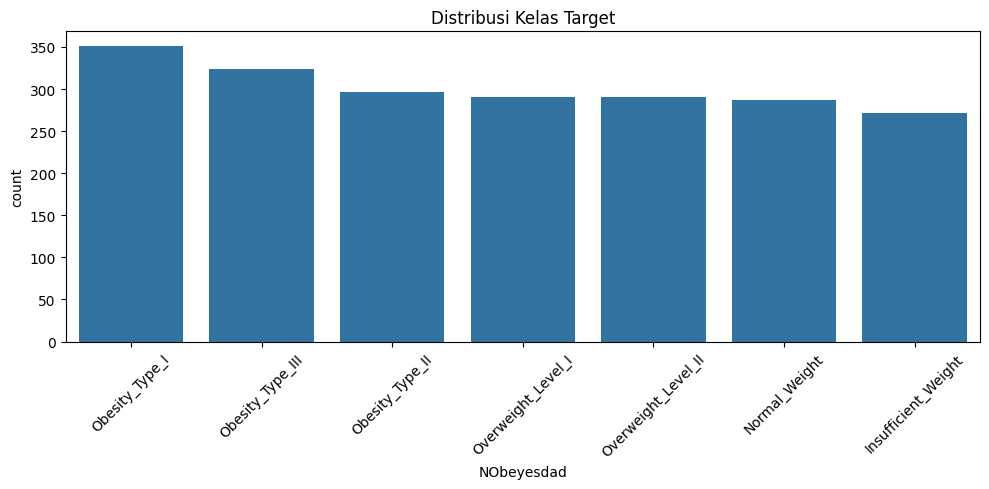

In [ ]:
# Visualisasi distribusi target
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Target")
plt.tight_layout()
plt.show()


In [ ]:
# Cek missing values, unique values, duplikasi, keseimbangan data
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values:\n", df.nunique())
print("\nDuplicated Rows:", df.duplicated().sum())



Missing Values:
 Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Unique Values:
 Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC        

In [ ]:
# Boxplot untuk deteksi outlier
df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_numeric.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
# Kesimpulan EDA: Data terdiri dari fitur numerik dan kategorikal,
# terdapat duplikasi, potensi outlier, serta imbalance di target class.

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# 2. Preprocessing Data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Salin data
df_clean = df.copy()

# Hapus duplikat
df_clean.drop_duplicates(inplace=True)

In [ ]:
# Pisahkan kolom numerik dan kategorikal
num_cols = df_clean.columns[df_clean.apply(pd.to_numeric, errors='coerce').notnull().all()].tolist()

cat_cols = df_clean.select_dtypes(include='object').drop('NObeyesdad', axis=1).columns

In [ ]:
# Imputasi missing values
num_imputer = SimpleImputer(strategy='mean')
df_clean[num_cols] = df_clean[num_cols].apply(pd.to_numeric, errors='coerce')


cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])


In [ ]:
# Tangani outlier dengan IQR
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]


In [ ]:
# Encode fitur kategorikal
encoder = LabelEncoder()
for col in cat_cols:
    df_clean[col] = encoder.fit_transform(df_clean[col])
df_clean['NObeyesdad'] = encoder.fit_transform(df_clean['NObeyesdad'])

In [ ]:
# Gunakan semua fitur
X = df_clean.drop('NObeyesdad', axis=1)
y = df_clean['NObeyesdad']


In [ ]:
# Tangani imbalance dengan SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Kesimpulan preprocessing: duplikasi, missing, dan outlier telah ditangani,
# data telah diencoding, diseimbangkan dan dinormalisasi.

In [ ]:
# 3. Pemodelan dan Evaluasi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=500)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

for name, metrics in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])



Random Forest Results:
Accuracy: 0.9370
Precision: 0.9407
Recall: 0.9370
F1-Score: 0.9379
Confusion Matrix:
 [[69  2  0  0  0  0  0]
 [ 1 65  0  0  0  3  2]
 [ 0  1 64  0  0  0  0]
 [ 0  1  0 67  1  0  0]
 [ 0  0  1  0 71  1  0]
 [ 0  8  0  0  0 55  1]
 [ 0  5  1  0  0  3 70]]

KNN Results:
Accuracy: 0.7825
Precision: 0.7761
Recall: 0.7825
F1-Score: 0.7738
Confusion Matrix:
 [[67  3  0  0  0  0  1]
 [18 30  2  4  0  9  8]
 [ 1  3 52  5  0  0  4]
 [ 0  0  2 65  1  1  0]
 [ 0  0  0  0 73  0  0]
 [ 5  3  6  0  0 45  5]
 [ 2  9  4  1  0 10 53]]

Logistic Regression Results:
Accuracy: 0.6240
Precision: 0.6207
Recall: 0.6240
F1-Score: 0.6188
Confusion Matrix:
 [[49 11  8  1  1  0  1]
 [17 29  8  2  1  7  7]
 [ 4  2 27 13  1  4 14]
 [ 1  0  1 62  1  2  2]
 [ 1  0  0  1 70  1  0]
 [ 2  6 11  1  1 35  8]
 [ 1  5 23  3  0 12 35]]


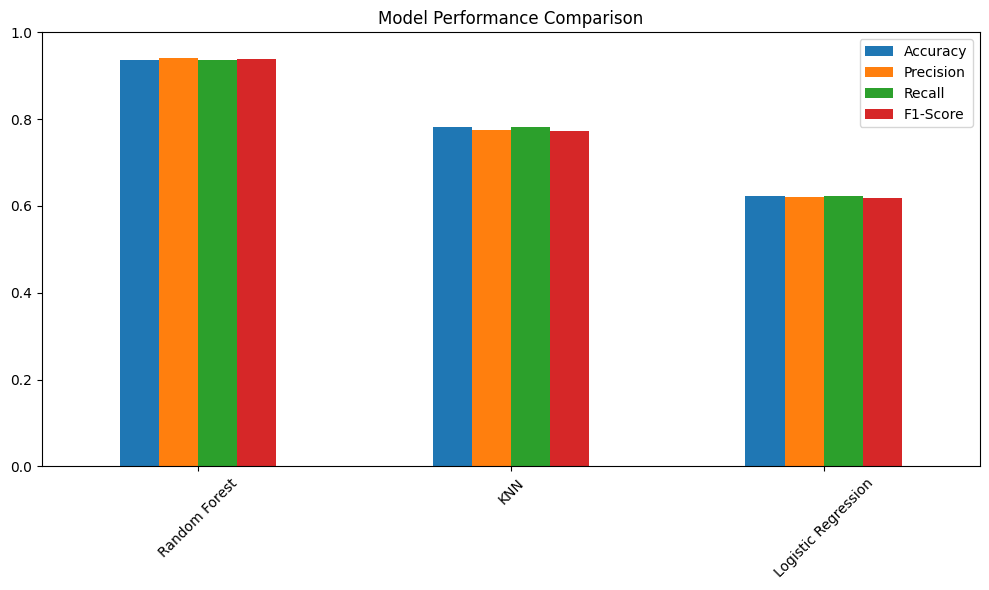

In [ ]:
# Visualisasi performa
scores_df = pd.DataFrame(results).T[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
scores_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), title='Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Kesimpulan pemodelan: Random Forest memberikan hasil terbaik dari semua metrik.

In [ ]:
# 4. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

In [ ]:
# Evaluasi ulang
y_pred_best = best_rf.predict(X_test)
print("\nTuned Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best, average='weighted'):.4f}")


Tuned Random Forest Results:
Accuracy: 0.9309
F1-Score: 0.9319


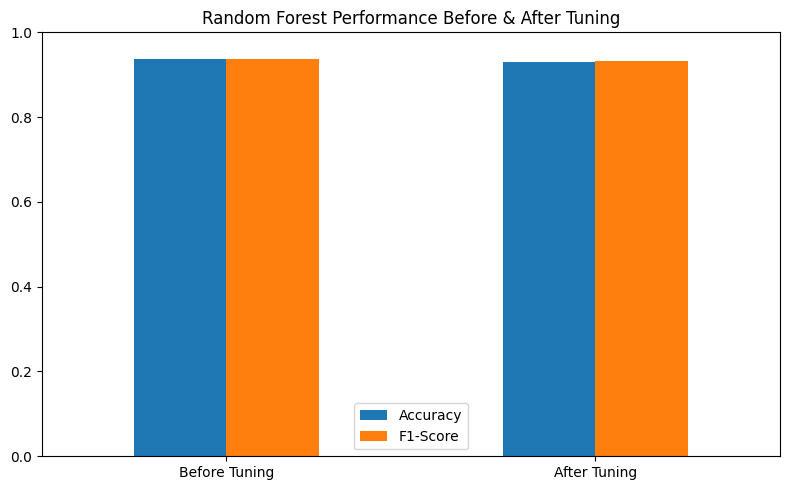

In [ ]:
# Visualisasi peningkatan performa
before_tuning = results['Random Forest']
after_tuning = {
    'Accuracy': accuracy_score(y_test, y_pred_best),
    'F1-Score': f1_score(y_test, y_pred_best, average='weighted')
}

improvement_df = pd.DataFrame([before_tuning, after_tuning], index=['Before Tuning', 'After Tuning'])[['Accuracy', 'F1-Score']]
improvement_df.plot(kind='bar', figsize=(8, 5), ylim=(0, 1), title='Random Forest Performance Before & After Tuning')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Kesimpulan tuning: GridSearchCV berhasil meningkatkan performa model Random Forest.


In [ ]:

# Contoh training model
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Simpan model dan scaler ke file .sav
joblib.dump(model, 'model_obesitas.sav')
joblib.dump(scaler, 'scaler_obesitas.sav')

# Download ke komputer
files.download('model_obesitas.sav')
files.download('scaler_obesitas.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>